In [34]:
# The guide for the practice is taken from https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python
#https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python/blob/main/notebooks/time_series_analysis/Chapter%201%20-%20Time%20Series%20Manipulation.ipynb

import pandas as pd 
import numpy 
import yfinance as yf
import matplotlib.pyplot as plt 


[*********************100%***********************]  1 of 1 completed


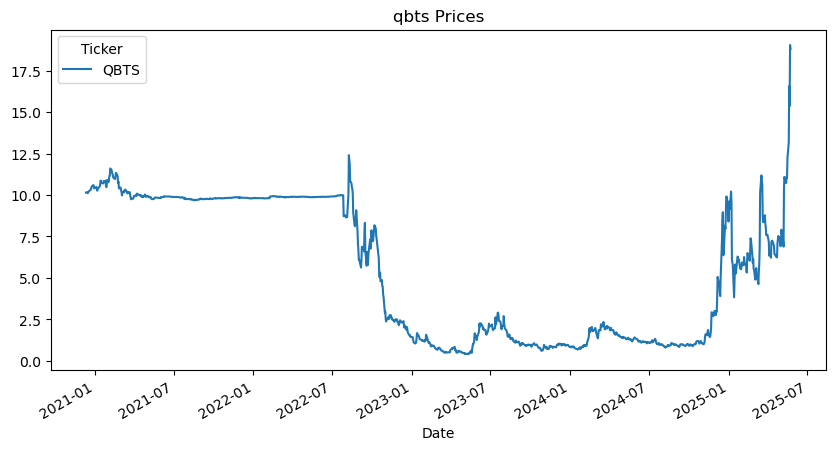

In [35]:
"""Weekday distributions for stocks"""
Data = input("Enter the stock ticker symbol (e.g., AAPL, MSFT): ")
Prices = yf.download(Data, period="5y", interval="1d")
Prices.isnull().sum()
Prices["Close"].plot(title= Data + ' Prices', figsize=(10, 5))
plt.show()

                 Mean  Standard Deviation   Kurtosis  Skewness
W-MON close  0.007031            0.107948  53.875859  5.460579
W-TUE close  0.003015            0.070854   3.787205  1.255583
W-WED close -0.001885            0.063444   6.744829  0.041053
W-THU close  0.003922            0.079688  10.269579  2.056460
W-FRI close  0.006169            0.086427  10.103110  2.278379
{'STD': Ticker
QBTS    0.082378
dtype: float64, 'MEAN': Ticker
QBTS    0.003568
dtype: float64}


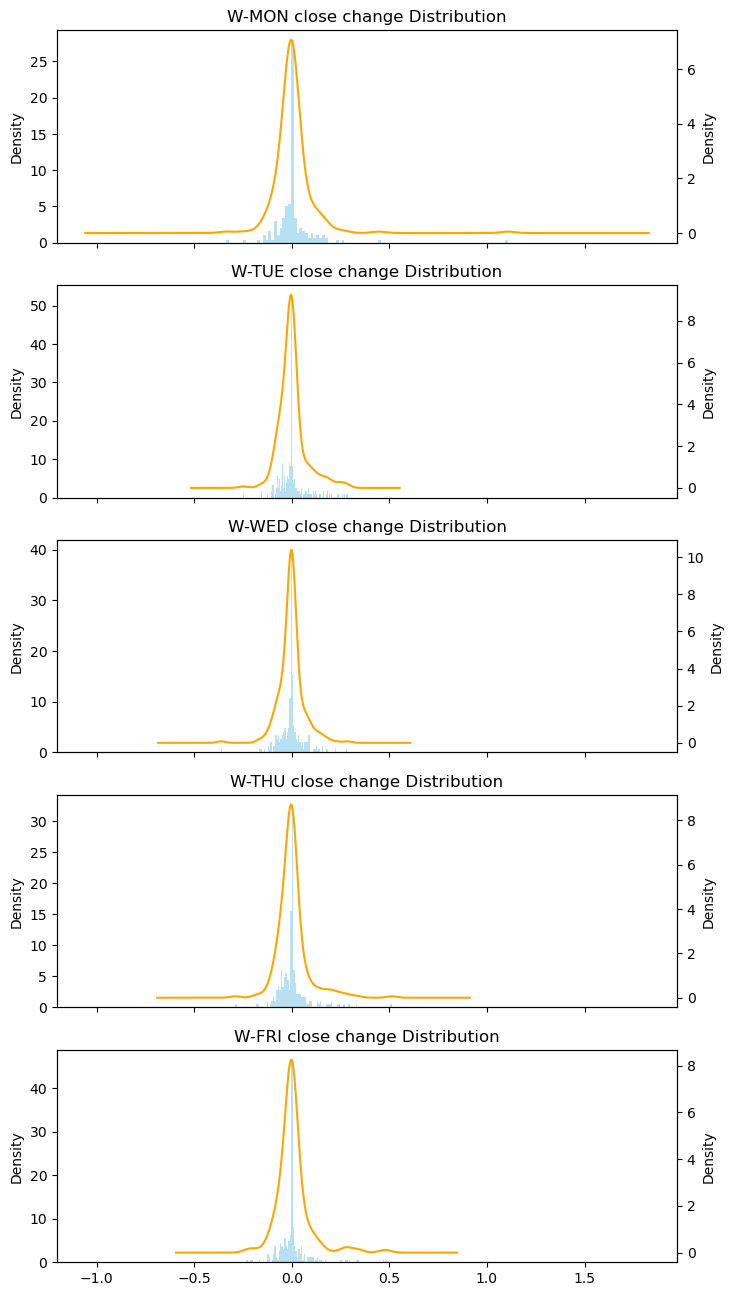

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

Prices = (Prices / Prices.shift()) - 1

weekday_returns = {}
for day in ["W-MON", "W-TUE", "W-WED", "W-THU", "W-FRI"]:
    Priceday = Prices['Close'].asfreq(day)
    weekday_returns[day + " close"] = Priceday.dropna()

weekprices = pd.concat(weekday_returns.values(), axis=1)
weekprices.columns = list(weekday_returns.keys())

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16), sharex=True)

for ax, (col, data) in zip(axes, weekprices.items()):
    # Histogram on primary y-axis
    n, bins, patches = ax.hist(data, bins=100,density=True, alpha=0.6, color='skyblue', label='Histogram')
    ax.set_ylabel("Density")
    ax.set_title(f"{col} change Distribution")
    
    # Density on secondary y-axis
    ax2 = ax.twinx()
    data.plot.kde(ax=ax2, color='orange', label='Density')



# Calculate stats
weekprices_stats = pd.DataFrame({
'Mean': weekprices.mean(),
'Standard Deviation': weekprices.std(),
'Kurtosis': weekprices.kurtosis(),
'Skewness': weekprices.skew()
})

STD = Prices["Close"].std()
MEAN = Prices["Close"].mean()

print(weekprices_stats)
print({"STD" : STD, "MEAN" : MEAN})